# Machine Learning: Use cases in FINTECH
- The data for these projects are manufactured fields based on trends found in real-world case studies. The fields describe what companies usually track from their users, and the distributions are based on observed distributions in the real-world analysis. This means that, although the data has been artificially created, the patterns, associations, and distributions are not random.
- The data serves as a good representation of what you may encounter in the workplace. That is, the data is rarely clean, and a lot of pre-processing is needed to get it ready for modeling.
****
# Note on models Building:
The Model Building Process is composed of multiple parts:

- **Plotting with Matplotlib and Seaborn** - A lot of time will be spent on Exploratory Data Analysis (EDA)
- **Data Manipulation** - We will use Pandas and Numpy for all of our data formatting steps.
- **Classification Models** from Sklearn Library (Logistic Regression, Tree, SVM, ...)
- **K-Fold Cross Validation, Grid Search** (Parameter Tuning), and **Feature Selection** algorithms.
*****

# 1. Introduction

Subscription Products often are the main source of revenue for companies across all industries. These products can come in form of an over compassing subscription, or in multi-level memberships. Regardless of how they structure their memberships, or what industry they are in, companies almost always try to minimize customer churn (a.k.a. subscription cancellations). To retain their disengagement with the product.

- **Market:** The target audience is the entirety of a company's subscription base. They are the ones companies want to keep.
- **Product:** The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.
- **Goal:** The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email reminders about the benefits of the product, especially focusing on features that are new or that the user has shown to value.
****

# 2. Business Challenge

- In this case study we will be working for a fin-tech company that provides a subscription product to its users, which allows them to manage their bank accounts (savings accounts, credit cards, etc), provides them with personalized coupons, informs them of the latest low-APR loans available in the market, and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health, etc) 
- We are in charge of identifying users who are likely to cancel their subscription so that we start building new features that they may be interested in, these features can increase the engagement and interest of our users towards the product.
****

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [50]:
data = pd.read_csv("data/churn_data.csv")
data.set_index('user', drop=True, inplace=True)
data.index.name =None
data.head()

,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
55409,0,37.00,na,nan,0,0,0,0,0,0,...,0,0,0,0,Leo,1,0,nan,0.00,0
23547,0,28.00,R,486.00,0,0,1,0,0,96,...,0,0,0,0,Leo,0,0,44.00,1.47,1
58313,0,35.00,R,561.00,47,2,86,47,0,285,...,0,0,0,0,Capricorn,1,0,65.00,2.17,0
8095,0,26.00,R,567.00,26,3,38,25,0,74,...,0,0,0,0,Capricorn,0,0,33.00,1.10,1
61353,1,27.00,na,nan,0,0,2,0,0,0,...,0,0,0,0,Aries,1,0,1.00,0.03,0


# 3. Data

- By subscribing to the membership, our customers have provided us with data on their finances, as well as how they handle those finances through the product. We also have some demographic information we acquired from them during the sign-up process.
- Financial data can often be unreliable and delayed. As a result, companies can sometimes build their marketing models using only demographic data, and data related to finances handled through the product itself. Therefore, we will be restricting ourselves to only using that type of data. Furthermore, product-related data is more indicative of what new features we should be creating as a company.
****

In [51]:
data.columns

Index(['churn', 'age', 'housing', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

# 4. Exploratory Data Analysis (EDA)

EDA allows us to:
- **Better understand the data:** 
> Getting domain knowledge by reading some articles about the topic you are working on. You don't need to go to deep.

- **Build intuition about the data:**
> Check if the data agree with the our domain knowledge.
- **Generate hypotheses:** 
> Understand how the data was generated, Find insights, and try to predict the output.
- **Exploring anonymized data:**
> Explore individual features, check if the values match with our domain knowledge. Explore features relations.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 55409 to 52752
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   churn                    27000 non-null  int64  
 1   age                      26996 non-null  float64
 2   housing                  27000 non-null  object 
 3   credit_score             18969 non-null  float64
 4   deposits                 27000 non-null  int64  
 5   withdrawal               27000 non-null  int64  
 6   purchases_partners       27000 non-null  int64  
 7   purchases                27000 non-null  int64  
 8   cc_taken                 27000 non-null  int64  
 9   cc_recommended           27000 non-null  int64  
 10  cc_disliked              27000 non-null  int64  
 11  cc_liked                 27000 non-null  int64  
 12  cc_application_begin     27000 non-null  int64  
 13  app_downloaded           27000 non-null  int64  
 14  web_user          

In [53]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.00,26996.00,18969.00,27000.00,27000.00,27000.00,27000.00,27000.00,27000.00,27000.00,...,27000.00,27000.00,27000.00,27000.00,27000.00,27000.00,27000.00,23773.00,27000.00,27000.00
mean,0.41,32.22,542.94,3.34,0.31,28.06,3.27,0.07,92.63,0.05,...,0.42,0.00,0.02,0.02,0.00,0.17,0.02,29.11,0.91,0.32
std,0.49,9.96,61.06,9.13,1.06,42.22,8.95,0.44,88.87,0.87,...,0.91,0.04,0.14,0.13,0.07,0.38,0.13,21.97,0.75,0.47
min,0.00,17.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,0.00,25.00,507.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,0.20,0.00
50%,0.00,30.00,542.00,0.00,0.00,9.00,0.00,0.00,65.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,0.78,0.00
75%,1.00,37.00,578.00,1.00,0.00,43.00,1.00,0.00,164.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.00,1.53,1.00
max,1.00,91.00,838.00,65.00,29.00,1067.00,63.00,29.00,522.00,65.00,...,5.00,1.00,1.00,1.00,1.00,1.00,1.00,114.00,4.00,1.00


### Look for unique values for each rows

In [54]:
for column in data.columns:
    print(f"{column} ==> Number of unique values {data[column].nunique()}")
    print("=============================")

churn ==> Number of unique values 2
age ==> Number of unique values 73
housing ==> Number of unique values 3
credit_score ==> Number of unique values 459
deposits ==> Number of unique values 66
withdrawal ==> Number of unique values 23
purchases_partners ==> Number of unique values 294
purchases ==> Number of unique values 64
cc_taken ==> Number of unique values 12
cc_recommended ==> Number of unique values 325
cc_disliked ==> Number of unique values 20
cc_liked ==> Number of unique values 9
cc_application_begin ==> Number of unique values 128
app_downloaded ==> Number of unique values 2
web_user ==> Number of unique values 2
app_web_user ==> Number of unique values 2
ios_user ==> Number of unique values 2
android_user ==> Number of unique values 2
registered_phones ==> Number of unique values 5
payment_type ==> Number of unique values 5
waiting_4_loan ==> Number of unique values 2
cancelled_loan ==> Number of unique values 2
received_loan ==> Number of unique values 2
rejected_loan ==

### Search for missing values for each feature

In [55]:
data.isnull().sum()

churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: int64

`age`,`rewards_earned`, and `credit_score` have missing values.

In [56]:
missing_val = ['age', 'rewards_earned', 'credit_score']
for column in missing_val:
    data[column].fillna(data[column].mean(), inplace=True)

In [57]:
data.isnull().sum()

churn                      0
age                        0
housing                    0
credit_score               0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64

### Search for duplicat rows

In [58]:
data.drop_duplicates(keep="first", inplace=True)
data.shape

(26491, 30)

### Search for duplicate features

In [59]:
data.T.drop_duplicates().shape

(30, 26491)

### Non Numerical Features

In [60]:
non_num_features = []
for column in data.columns:
    if data[column].dtype == object:
        non_num_features.append(column)
non_num_features

['housing', 'payment_type', 'zodiac_sign']

In [61]:
for column in non_num_features:
    print(f"{column.upper()}:\nValue Counts:\n {data[column].value_counts()}")
    print("==================================")

HOUSING:
Value Counts:
 na    13557
R     10797
O      2137
Name: housing, dtype: int64
PAYMENT_TYPE:
Value Counts:
 Bi-Weekly       12461
Weekly           5205
na               3834
Monthly          2603
Semi-Monthly     2388
Name: payment_type, dtype: int64
ZODIAC_SIGN:
Value Counts:
 Virgo          2372
Cancer         2366
Leo            2331
Taurus         2193
Gemini         2128
na             2105
Pisces         2090
Libra          2087
Aquarius       2083
Scorpio        2082
Sagittarius    2015
Aries          1970
Capricorn       669
Name: zodiac_sign, dtype: int64


### Categorical Feature

In [62]:
nominal_col = []
for column in data.columns:
    if len(data[column].unique()) <= 20 and data[column].dtype != object:
        nominal_col.append(column)
        
nominal_col.remove('churn')
print(nominal_col)

['cc_taken', 'cc_disliked', 'cc_liked', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']


### Continous Features

In [63]:
cont_col = []
for column in data.columns:
    if len(data[column].unique()) > 20 and data[column].dtype != object:
        cont_col.append(column)
        
print(cont_col)

['age', 'credit_score', 'deposits', 'withdrawal', 'purchases_partners', 'purchases', 'cc_recommended', 'cc_application_begin', 'rewards_earned', 'reward_rate']


In [64]:
for column in nominal_col:
    print(f"{column.upper()}:\nValue Counts:\n {data[column].value_counts()}")
    print("==================================")

CC_TAKEN:
Value Counts:
 0     25210
1       915
2       214
3        73
4        45
5        16
6        11
10        2
7         2
29        1
11        1
8         1
Name: cc_taken, dtype: int64
CC_DISLIKED:
Value Counts:
 0     25940
1       360
2        77
4        36
3        34
5        11
6         9
8         3
15        3
9         3
7         2
10        2
11        2
59        2
12        2
62        1
25        1
65        1
13        1
23        1
Name: cc_disliked, dtype: int64
CC_LIKED:
Value Counts:
 0     26265
1       180
2        25
3        11
4         6
27        1
10        1
9         1
8         1
Name: cc_liked, dtype: int64
APP_DOWNLOADED:
Value Counts:
 1    25278
0     1213
Name: app_downloaded, dtype: int64
WEB_USER:
Value Counts:
 1    16062
0    10429
Name: web_user, dtype: int64
APP_WEB_USER:
Value Counts:
 1    14932
0    11559
Name: app_web_user, dtype: int64
IOS_USER:
Value Counts:
 0    16022
1    10469
Name: ios_user, dtype: int64
ANDROID_USER:
Va

**Conclusions:**

***
- In this section, we have explored our data (the dtype of feature,  fill missing values, categorical features), Looked for unique values for each rows, Searched for duplicat rows, and Searched for duplicat features.
*** 

## Data Visualization

- Visualize your data and search for pattern that can help you solve your problem.
- Correlation analysis helps us to see features relatations.

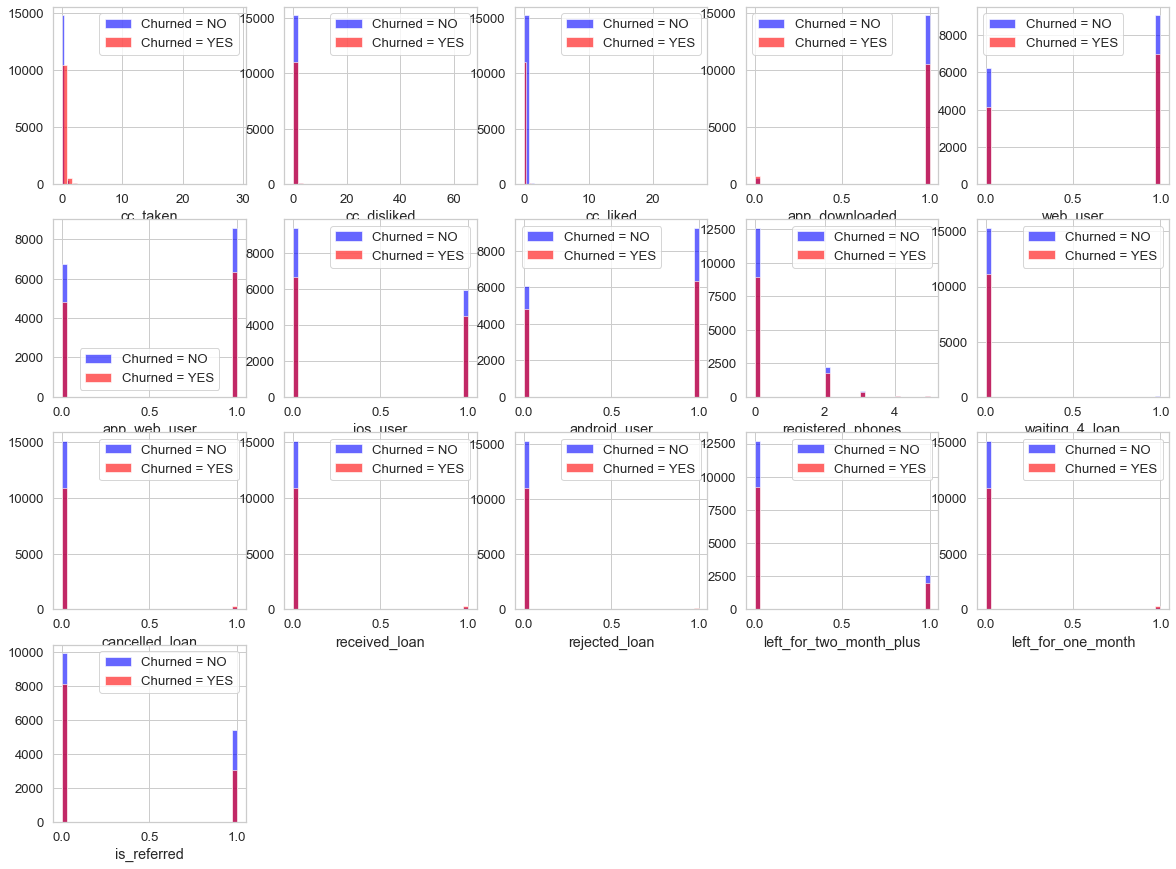

In [65]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(nominal_col, 1):
    plt.subplot(4, 5, i)
    data[data["churn"] == 0][column].hist(bins=35, color='blue', label='Churned = NO', alpha=0.6)
    data[data["churn"] == 1][column].hist(bins=35, color='red', label='Churned = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

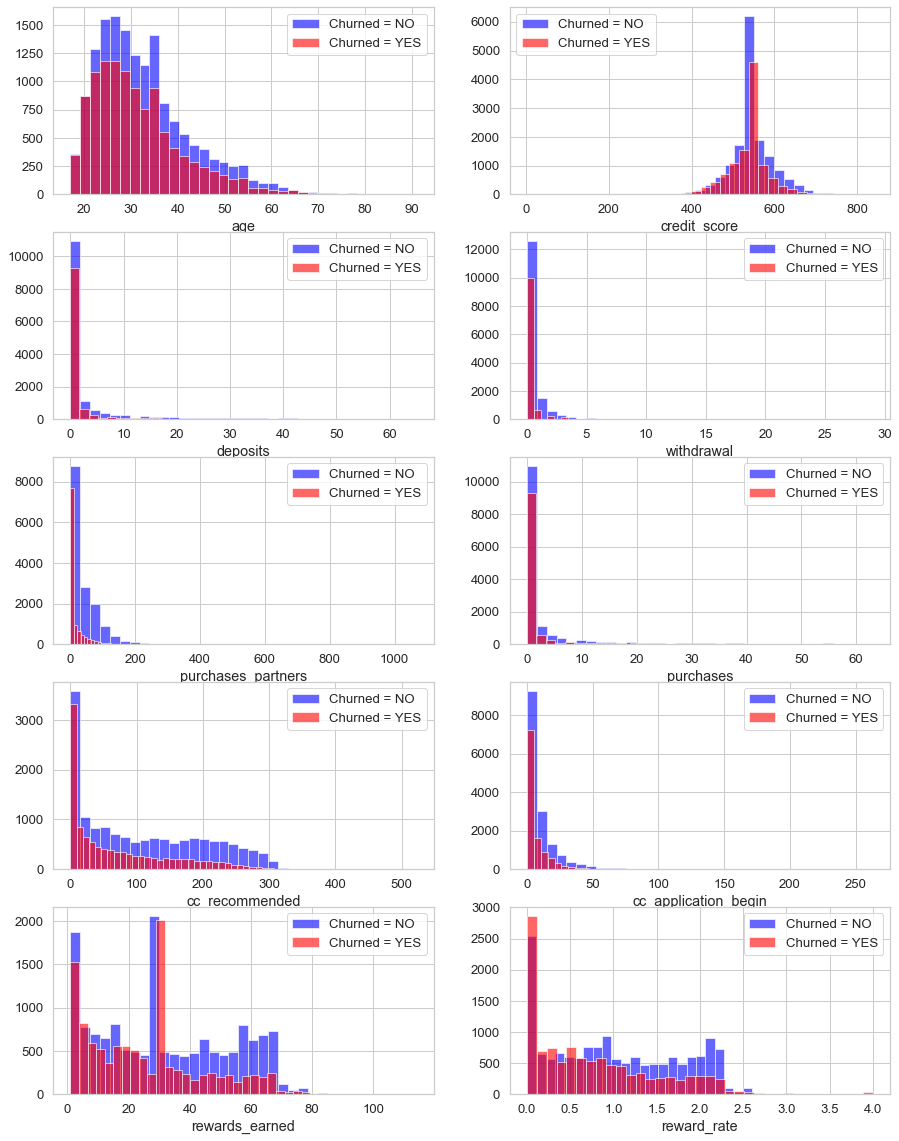

In [66]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(cont_col, 1):
    plt.subplot(5, 2, i)
    data[data["churn"] == 0][column].hist(bins=35, color='blue', label='Churned = NO', alpha=0.6)
    data[data["churn"] == 1][column].hist(bins=35, color='red', label='Churned = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Histograms

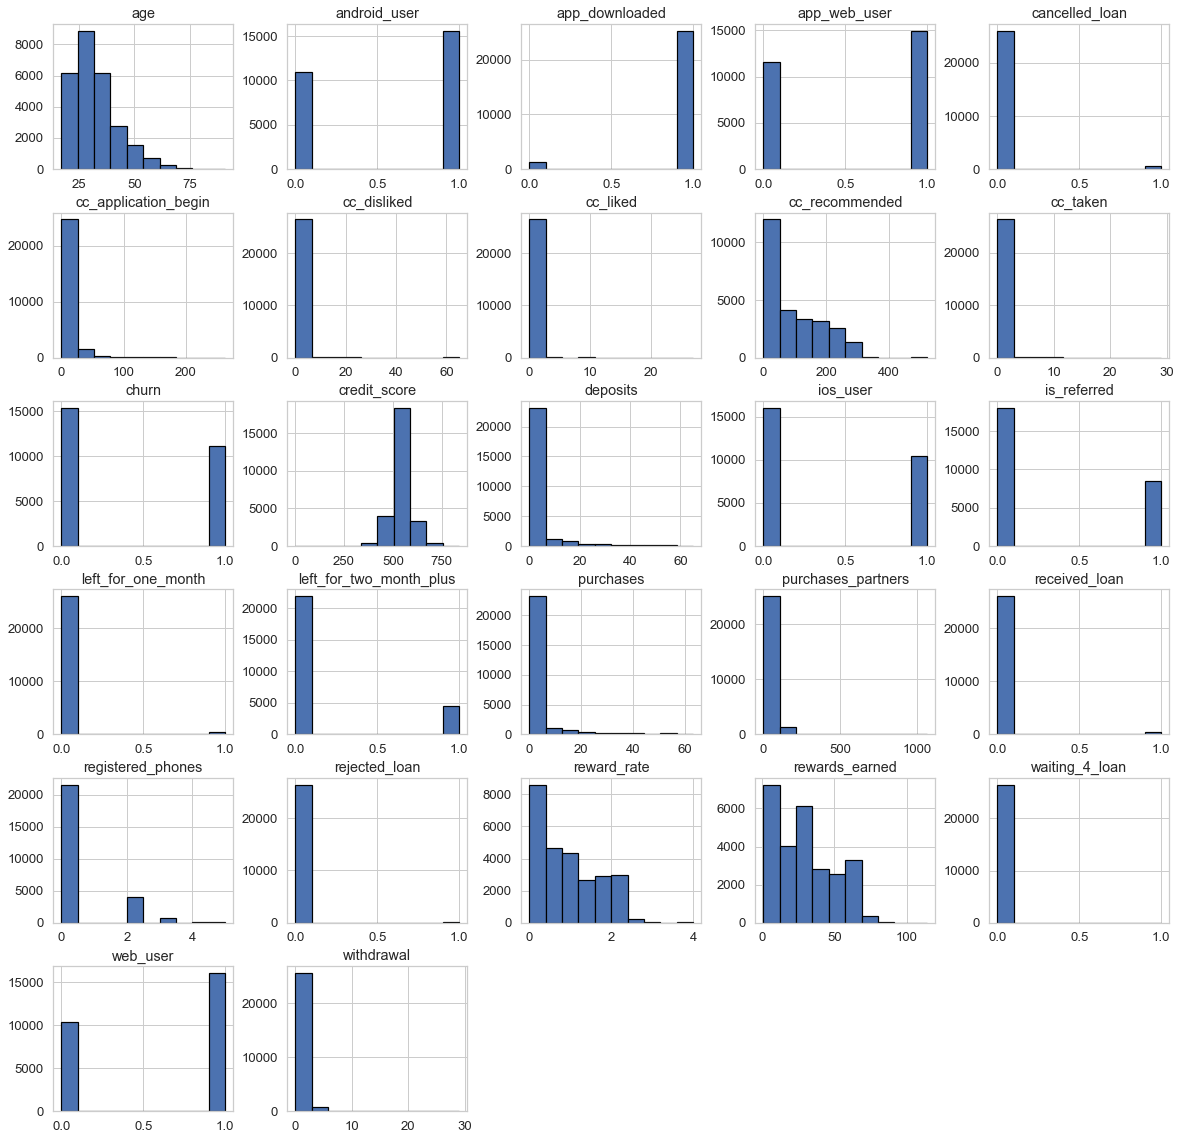

In [67]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

### Visualizing categorical features, and how they vary with the target feature

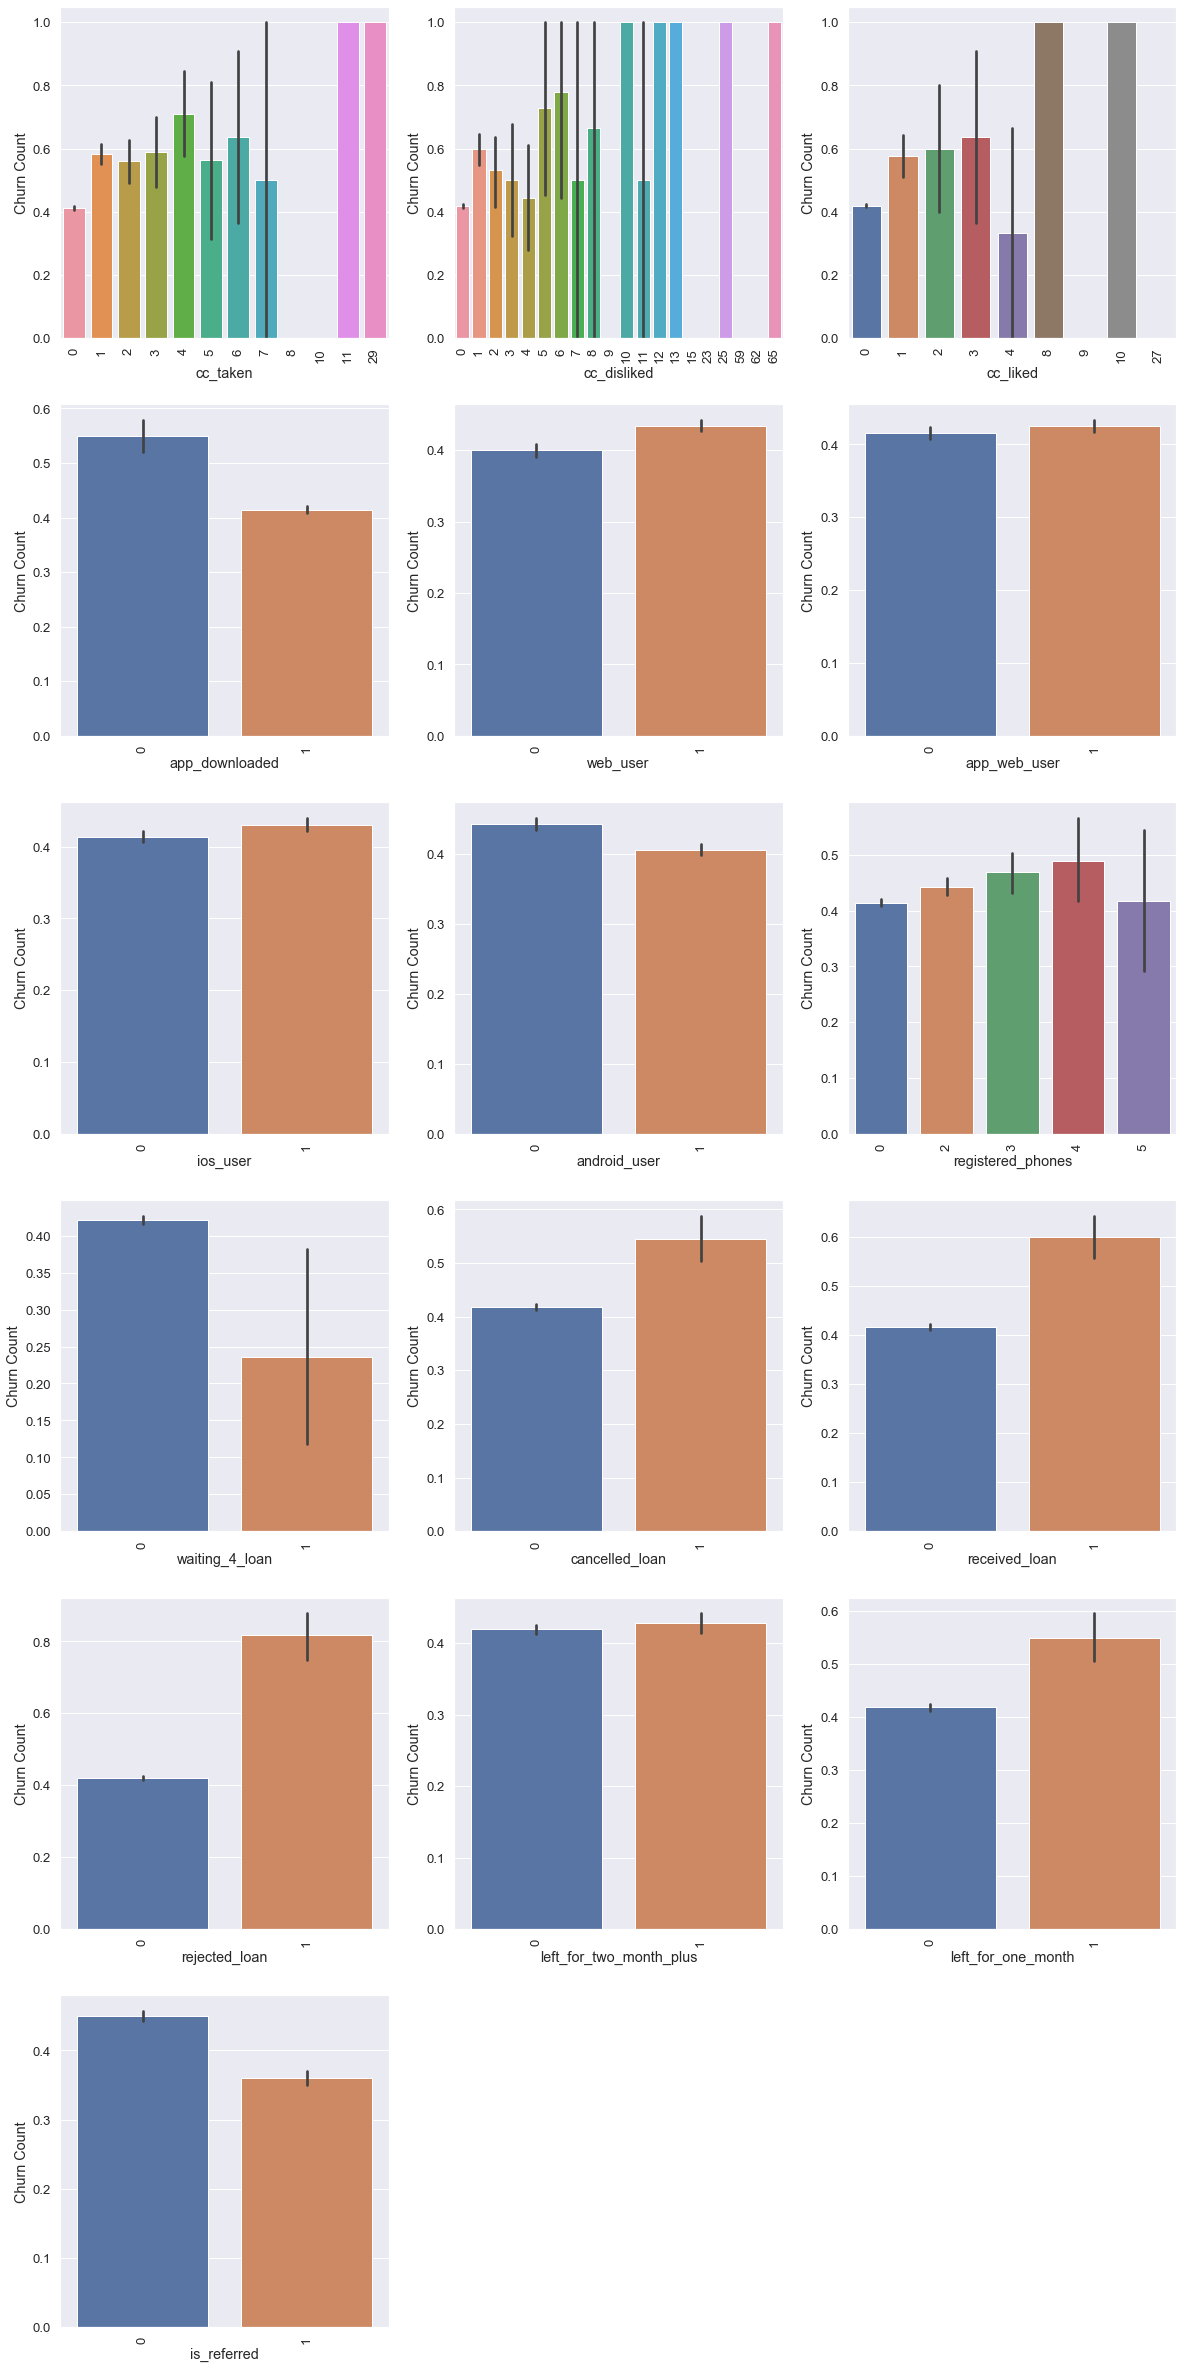

In [68]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 50))

for i, column in enumerate(nominal_col, 1):
    plt.subplot(7, 3, i)
    g = sns.barplot(x=f"{column}", y='churn', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

### Pie charts

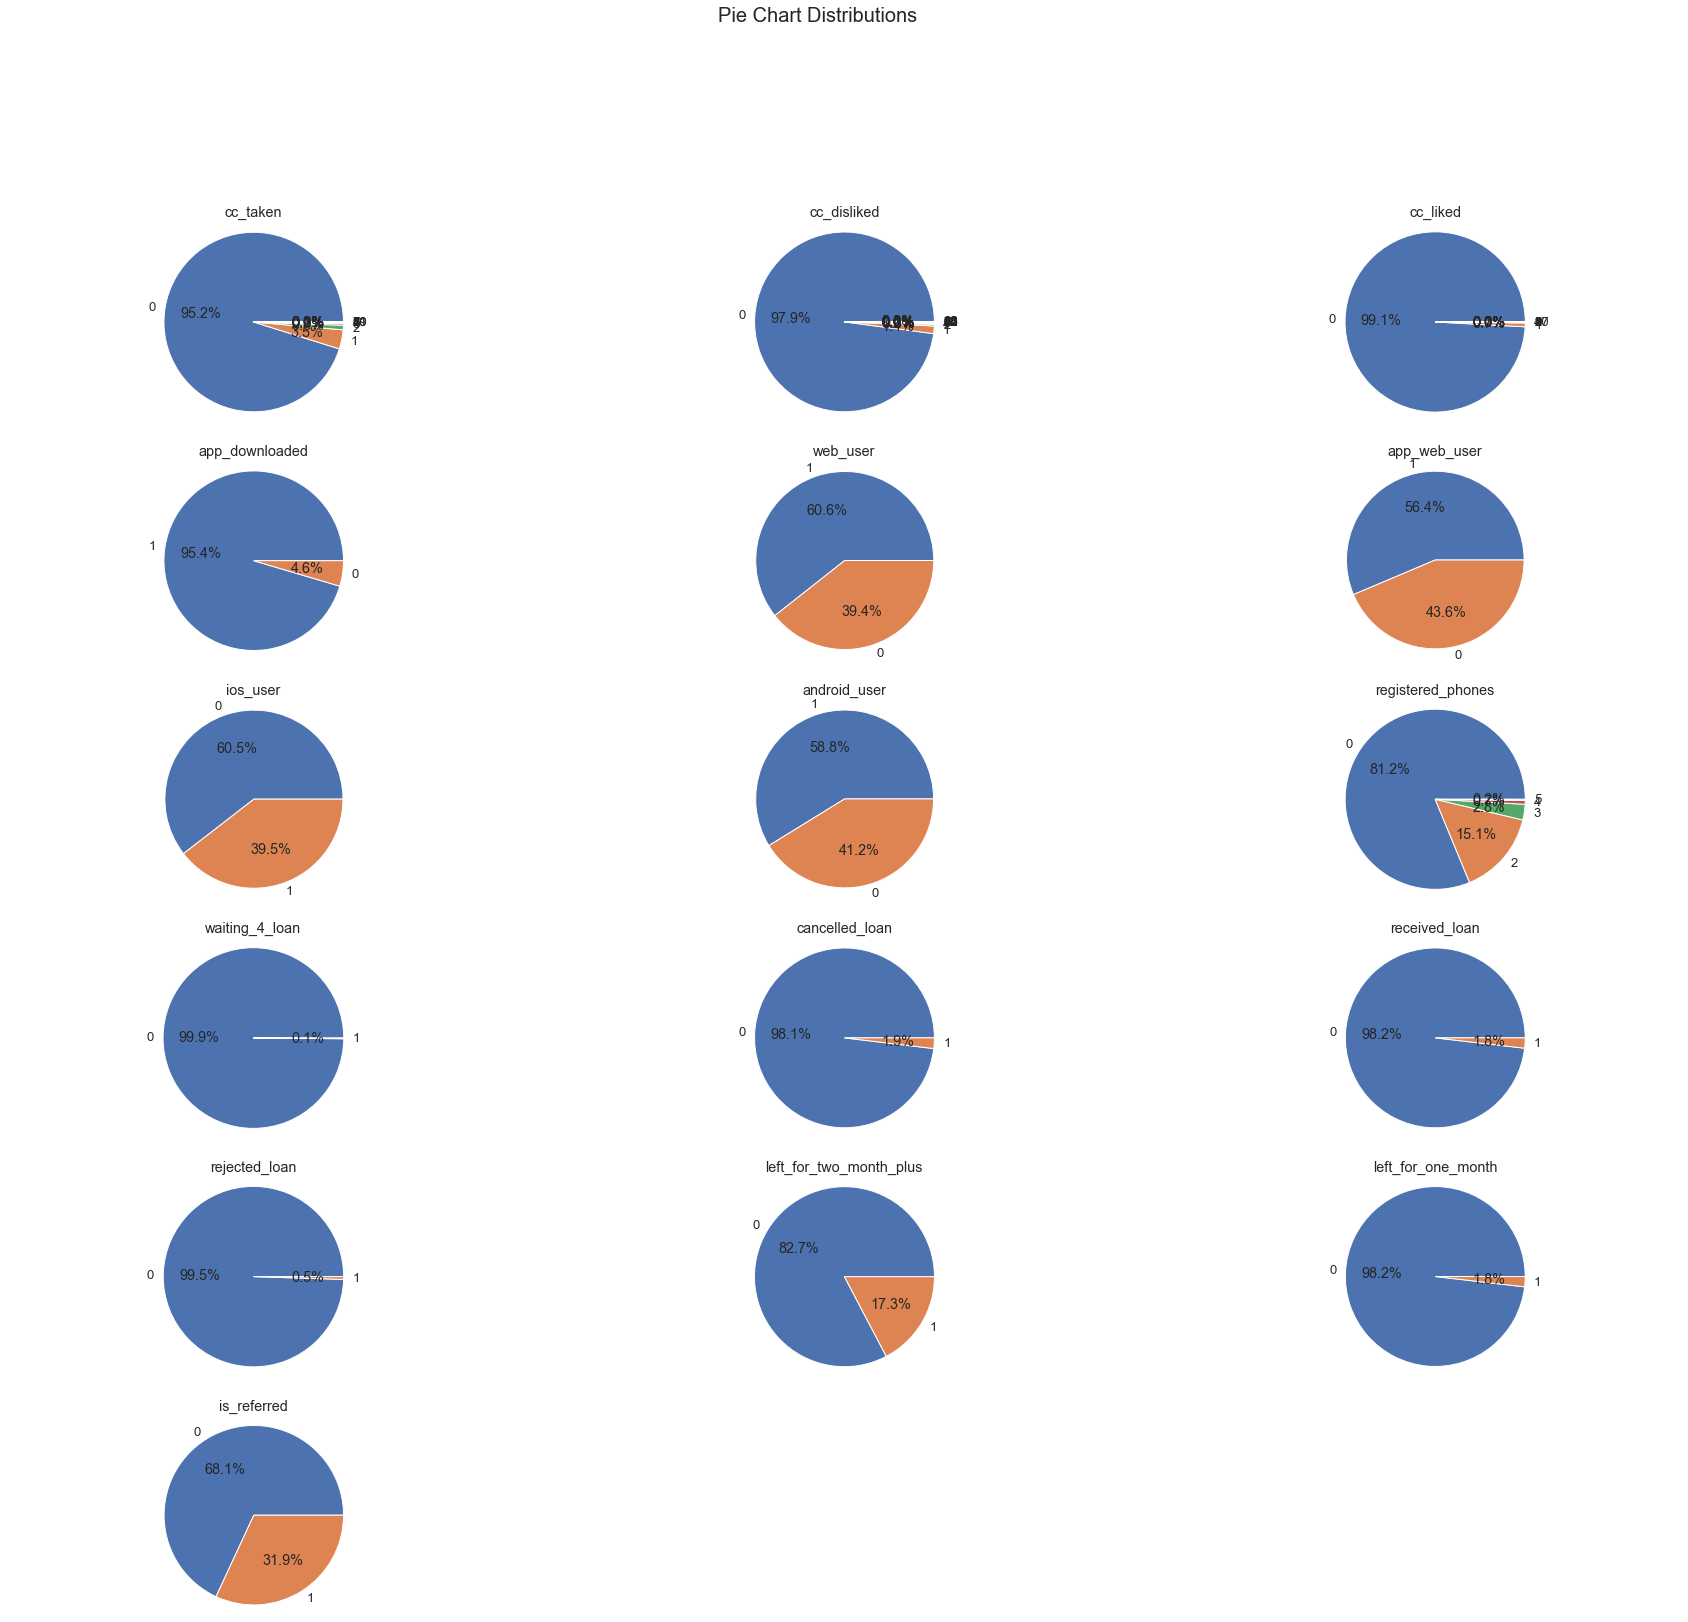

In [69]:
fig = plt.figure(figsize=(30, 30))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i, column in enumerate(nominal_col, 1) :
    plt.subplot(7, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(f"{column}")
   
    values = data[column].value_counts(normalize = True).values
    index = data[column].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%', radius=4)
    plt.axis('equal')
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Correlation Analysis

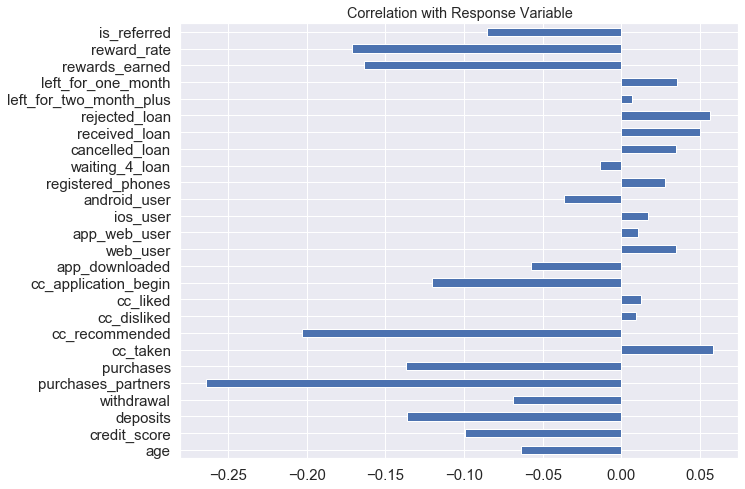

In [70]:
title = 'Correlation with Response Variable'
data.drop('churn', axis=1).corrwith(data.churn).plot.barh(figsize=(10, 8), 
                                                          title=title,
                                                          fontsize=15, grid=True)

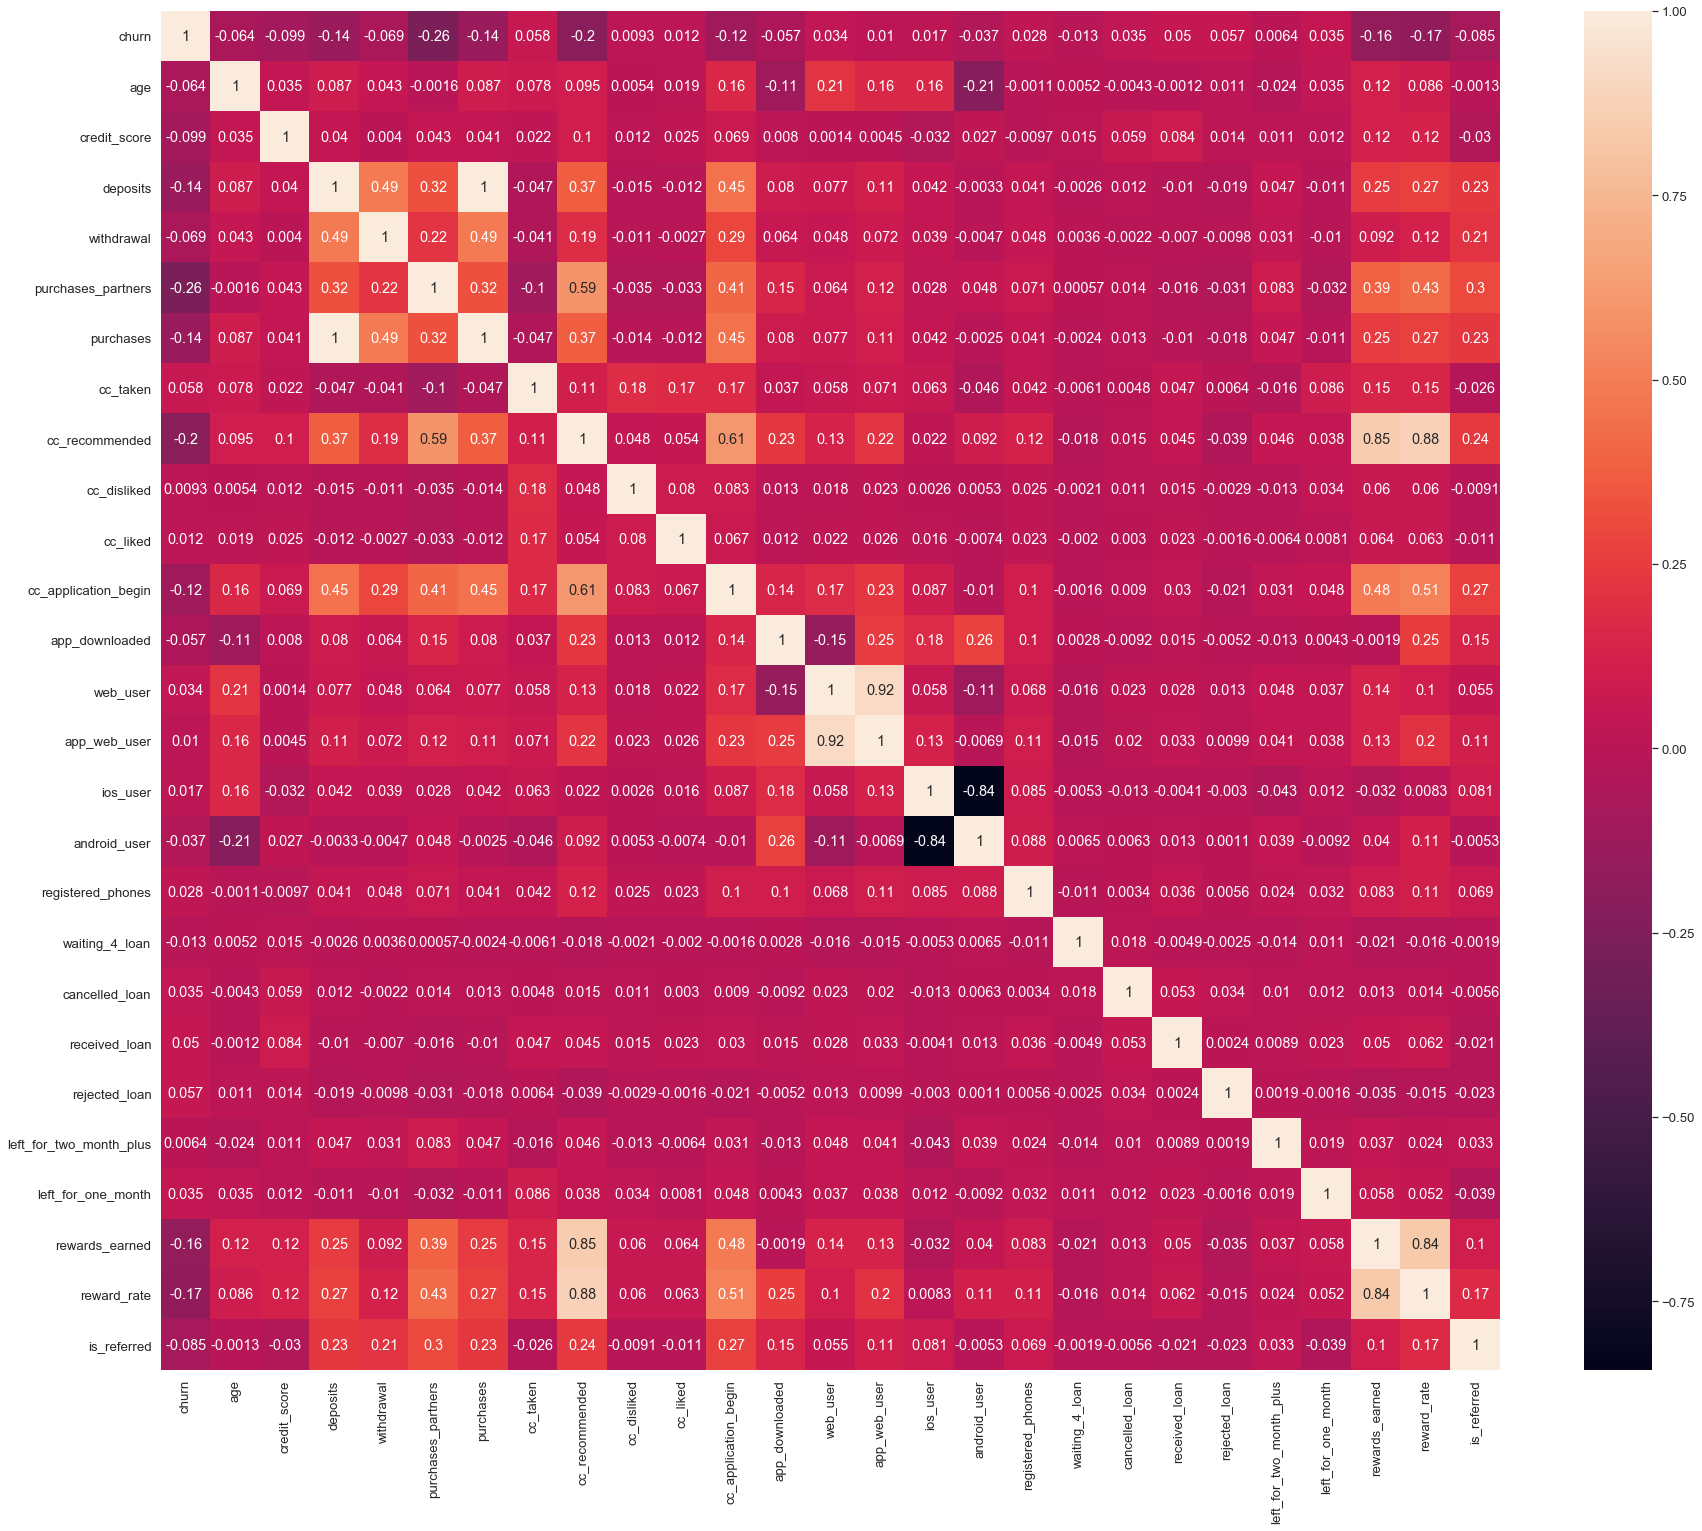

In [71]:
plt.figure(figsize=(30, 25))
sns.heatmap(data.corr(), annot=True)

In [72]:
neg_corr = []
pos_corr = []

for corr, col in zip(data.drop(non_num_features, axis=1).corrwith(data.churn), data.drop(non_num_features, axis=1).columns):
    if corr < 0:
        neg_corr.append((col, corr))
    else:
        pos_corr.append((col, corr))
    
print(neg_corr)
print(pos_corr)

[('age', -0.06363964900583435), ('credit_score', -0.09921520846082213), ('deposits', -0.13630910714931624), ('withdrawal', -0.06924104118142199), ('purchases_partners', -0.2641548446378494), ('purchases', -0.1368547658444478), ('cc_recommended', -0.2029270783225805), ('cc_application_begin', -0.12067905701849972), ('app_downloaded', -0.057245777052888996), ('android_user', -0.03657863645025815), ('waiting_4_loan', -0.013474308823325634), ('rewards_earned', -0.16332825596265244), ('reward_rate', -0.17119000580477467), ('is_referred', -0.08522155547536922)]
[('churn', 1.0), ('cc_taken', 0.05823907616529925), ('cc_disliked', 0.009278728183298597), ('cc_liked', 0.012274190228914905), ('web_user', 0.03445348079490094), ('app_web_user', 0.010286667893149535), ('ios_user', 0.016580828170341556), ('registered_phones', 0.02781162851299254), ('cancelled_loan', 0.034906720756016724), ('received_loan', 0.04983249716114804), ('rejected_loan', 0.05653600600167466), ('left_for_two_month_plus', 0.0064

**Conclusions:**

***
- Features with negative correlation mean that the more those parameters dicrease, the more likely that the user will churn.

- Features with positive correlation mean that the more those parameters increase, the more likely that the user will stay.

- The most interesting remark from the graph is that `cc_recommended` and `purchases_partners` are negatively correlated with `churn`. That's mean that the users are annoyed by the car recommendations.
- There are a lot of highly correlated variables so we need to drop them. 
- Note: Although there are somewhat correlated fields, they are not colinear. These feature are not functions of each other, so they won't break the model, But these feature won't help much either. Feature Selection should remove them.
*** 

In [73]:
columns = ['purchases', 'app_web_user', 'cc_taken', 'cc_disliked', 
           'cc_liked', 'waiting_4_loan']
data.drop(columns, axis=1, inplace=True)

# 5. Data Pre-Processing

- Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.

- In Real world data are generally incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data. Noisy: containing errors or outliers. Inconsistent: containing discrepancies in codes or names.

- Feaures can be numeric, categorical, ordinal, datetime, or coordinates.
- Feature pre-processing is often necessary and it depand on the model you are going to use (Tree-based models or non tree-based models).
- Feature generation is a powerfull technique.

### Categorical and ordinal features:
- Ordinal feature: (Ticket class 1-2-3, Driver's licence A- B -C,...)
    - 1. Alphabetical (sorted): [B, A, C] ==> [2, 1, 3], `sklearn.preprocessing.LabelEncoder`
    - 2. Order of apperance: [B, A, C] ==> [1, 2, 3], `pandas.factorize`
    - 3. Frequency encoding: [B, A, C] ==> [0.5, 0.3, 0.2]
    - 4. One-Hot Oncoding: `pandas.get_dummies`, `sklearn.preprocessing.OneHotEncoder`
- Values in ordinal features are sorted in some meaningful order.
- Label encoding maps categories to numbers.
- Frequency encoding maps categories to their frequencies.
- Label and Frequency encoding are often used for tree based models.
- One-Hot Encoding is often used for non-tree based models.
- Interaction of categorical features can help linear and KNN models

In [74]:
categorical_col = []
for column in data.drop('churn', axis=1).columns:
    if 2 < len(data[column].unique()) <= 20:
        categorical_col.append(column)
        
print(categorical_col)

['housing', 'registered_phones', 'payment_type', 'zodiac_sign']


In [75]:
non_num_features = []
for column in data.columns:
    if data[column].dtype == object:
        non_num_features.append(column)
non_num_features

['housing', 'payment_type', 'zodiac_sign']

In [76]:
def map_age(age):
    if 25 > age >= 16:
        return 1
    elif 35 > age >= 25:
        return 2
    elif 50 > age >= 35:
        return 3
    elif 65 > age >= 50:
        return 4
    elif age >= 65:
        return 5

In [77]:
data['age'] = data.age.apply(map_age)

In [78]:
data_1 = pd.get_dummies(data, columns=categorical_col, drop_first=True)
data_1.head()

,churn,age,credit_score,deposits,withdrawal,purchases_partners,cc_recommended,cc_application_begin,app_downloaded,web_user,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
55409,0,3,542.94,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
23547,0,2,486.00,0,0,1,96,5,1,1,...,0,0,1,0,0,0,0,0,0,0
58313,0,3,561.00,47,2,86,285,9,1,0,...,1,0,0,0,0,0,0,0,0,0
8095,0,2,567.00,26,3,38,74,26,1,0,...,1,0,0,0,0,0,0,0,0,0
61353,1,2,542.94,0,0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### Drop Duplicate Rows and Columns

In [79]:
print(data_1.shape)

# Remove duplicate Features
data_1 = data_1.T.drop_duplicates()
data_1 = data_1.T

# Remove Duplicate Rows
data_1.drop_duplicates(inplace=True)

print(data_1.shape)

(26491, 42)
(25523, 42)


### Splitting the data-set into Training and Test Set

In [80]:
X = data_1.drop('churn', axis=1)
y = data_1.churn

print(X.shape)
print(y.shape)

(25523, 41)
(25523,)


### Split the data into training and test datasets

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n") 

# 6. Model Building

## 6. 1. Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(lr_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 65.09%
_______________________________________________
Classification Report:	Precision Score: 60.22%
			Recall Score: 55.06%
			F1 score: 57.53%
_______________________________________________
Confusion Matrix: 
 [[7405 2790]
 [3447 4224]]

Test Result:
Accuracy Score: 65.84%
_______________________________________________
Classification Report:	Precision Score: 61.83%
			Recall Score: 56.60%
			F1 score: 59.10%
_______________________________________________
Confusion Matrix: 
 [[3151 1167]
 [1449 1890]]



### Logistic Regression Cross-Validation Score

In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X, y, cv=5)
print(f"Logistic Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

Logistic Accuracy: 65.17% +/- (0.90)


In [85]:
col = list(data_1.drop('churn', axis=1).columns)
coefficient = pd.DataFrame(data=lr_classifier.coef_.T, index=col, 
                           columns=["Coef_"])
coefficient.head()

,Coef_
age,-0.17
credit_score,-0.00
deposits,-0.01
withdrawal,0.04
purchases_partners,-0.02


## 6. 2. Random Forest

In [86]:
y.value_counts()
zeros = (y.value_counts()[0] / y.shape)[0]
ones = (y.value_counts()[1] / y.shape)[0]

print(f"Not Churned users Rate: {zeros}")
print(f"Churned users Rate: {ones}")

Not Churned users Rate: 0.5686243780119892
Churned users Rate: 0.4313756219880108


In [87]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1500, 
                                     oob_score=True, 
                                     class_weight={0:zeros, 1:ones})
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.62%
_______________________________________________
Classification Report:	Precision Score: 99.86%
			Recall Score: 99.27%
			F1 score: 99.56%
_______________________________________________
Confusion Matrix: 
 [[10184    11]
 [   56  7615]]

Test Result:
Accuracy Score: 71.84%
_______________________________________________
Classification Report:	Precision Score: 70.25%
			Recall Score: 61.46%
			F1 score: 65.56%
_______________________________________________
Confusion Matrix: 
 [[3449  869]
 [1287 2052]]



In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=100, oob_score=True, class_weight={0:zeros, 1:ones})

param_grid = {'n_estimators':[100, 500, 1000, 1500],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_search_cv = GridSearchCV(rf, param_grid, scoring="accuracy", n_jobs=-1,
                                 verbose=1, cv=3)
# rf_grid_search_cv.fit(X_train, y_train)

In [89]:
# rf_grid_search_cv.best_estimator_

In [90]:
rand_forest = RandomForestClassifier(criterion='gini',
                                     max_depth=None,
                                     min_samples_leaf=1, 
                                     min_samples_split=2,
                                     n_estimators=1000, 
                                     oob_score=True, 
                                     class_weight={0:zeros, 1:ones})

rand_forest.fit(X_train, y_train)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.62%
_______________________________________________
Classification Report:	Precision Score: 99.87%
			Recall Score: 99.26%
			F1 score: 99.56%
_______________________________________________
Confusion Matrix: 
 [[10185    10]
 [   57  7614]]

Test Result:
Accuracy Score: 72.17%
_______________________________________________
Classification Report:	Precision Score: 70.61%
			Recall Score: 61.96%
			F1 score: 66.01%
_______________________________________________
Confusion Matrix: 
 [[3457  861]
 [1270 2069]]



### Random Forest Cross-Validation Score

In [91]:
scores = cross_val_score(rand_forest, X, y, cv=5)
print(scores)
print(f"Random Forest Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.71753183 0.7238002  0.71890304 0.71061912 0.72923197]
Random Forest Accuracy: 72.00% +/- (0.62)


## 6. 3. XGBoost Classifier

In [92]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=0.5, 
                        n_estimators=150, 
                        base_score=0.3)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.87%
_______________________________________________
Classification Report:	Precision Score: 74.98%
			Recall Score: 69.23%
			F1 score: 71.99%
_______________________________________________
Confusion Matrix: 
 [[8423 1772]
 [2360 5311]]

Test Result:
Accuracy Score: 71.92%
_______________________________________________
Classification Report:	Precision Score: 69.27%
			Recall Score: 64.00%
			F1 score: 66.53%
_______________________________________________
Confusion Matrix: 
 [[3370  948]
 [1202 2137]]



In [93]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier()

n_estimators = [50, 100, 250, 500, 750]
max_depth = [3, 5, 10, 15]
learning_rate = [0.05, 0.01, 0.5, 0.1]
min_child_weight = [2, 3, 5, 10]
base_score = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7]

hyperparameter_grid = {'n_estimators': n_estimators, 
                       'max_depth': max_depth, 
                       'learning_rate' : learning_rate, 
                       'min_child_weight' : min_child_weight,
                       'base_score' : base_score}

xgb_grid_search_cv = RandomizedSearchCV(xgb_clf, 
                                        hyperparameter_grid, 
                                        scoring="accuracy", 
                                        n_jobs=-1, verbose=1, cv=3, n_iter=500)
# xgb_grid_search_cv.fit(X_train, y_train)

In [94]:
# xgb_grid_search_cv.best_estimator_

In [95]:
xgb_clf = XGBClassifier(base_score=0.7, 
                        booster='gbtree',
                        learning_rate=0.01, 
                        max_depth=15,
                        min_child_weight=5, 
                        n_estimators=500)

xgb_clf.fit(X_train, y_train)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.78%
_______________________________________________
Classification Report:	Precision Score: 86.01%
			Recall Score: 82.66%
			F1 score: 84.30%
_______________________________________________
Confusion Matrix: 
 [[9164 1031]
 [1330 6341]]

Test Result:
Accuracy Score: 72.03%
_______________________________________________
Classification Report:	Precision Score: 68.99%
			Recall Score: 65.11%
			F1 score: 67.00%
_______________________________________________
Confusion Matrix: 
 [[3341  977]
 [1165 2174]]



### XGBoost Cross-Validation Score

In [96]:
scores = cross_val_score(xgb_clf, X, y, cv=5)
print(scores)
print(f"XGBoost Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.71439765 0.72869736 0.72438786 0.71336207 0.73432602]
XGBoost Accuracy: 72.30% +/- (0.81)


## 6. 4. ExtraTree 

In [104]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(criterion='entropy',
                                 max_depth=None,
                                 min_samples_leaf=1, 
                                 min_samples_split=2,
                                 n_estimators=1000,
                                 oob_score=True,
                                 class_weight={0:zeros, 1:ones},
                                 bootstrap=True)
extra_clf.fit(X_train, y_train)

print_score(extra_clf, X_train, y_train, X_test, y_test, train=True)
print_score(extra_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.62%
_______________________________________________
Classification Report:	Precision Score: 99.79%
			Recall Score: 99.34%
			F1 score: 99.56%
_______________________________________________
Confusion Matrix: 
 [[10179    16]
 [   51  7620]]

Test Result:
Accuracy Score: 69.71%
_______________________________________________
Classification Report:	Precision Score: 68.48%
			Recall Score: 56.60%
			F1 score: 61.98%
_______________________________________________
Confusion Matrix: 
 [[3448  870]
 [1449 1890]]



In [ ]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_estimator_

In [ ]:
svc = SVC(C=100, gamma=1, kernel='rbf')
svc.fit(X_train, y_train)

print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

In [ ]:
scores = cross_val_score(svc, X, y, cv=5)
print(scores)
print(f"Support Vector Machine Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

# 7. Feature Selection

In [105]:
from sklearn.feature_selection import RFE

In [107]:
rfe = RFE(xgb_clf, 20)

In [108]:
rfe = rfe.fit(X_train, y_train)

In [112]:
important_columns = X_train.columns[rfe.support_]
print(important_columns)

Index(['credit_score', 'purchases_partners', 'cc_recommended',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred', 'registered_phones_2',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aries', 'zodiac_sign_Gemini', 'zodiac_sign_Pisces',
       'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')


In [113]:
X_train = X_train[important_columns]
X_test = X_test[important_columns]

xgb_clf = XGBClassifier(base_score=0.7, 
                        booster='gbtree',
                        learning_rate=0.01, 
                        max_depth=15,
                        min_child_weight=5, 
                        n_estimators=500)

xgb_clf.fit(X_train, y_train)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.65%
_______________________________________________
Classification Report:	Precision Score: 81.77%
			Recall Score: 76.69%
			F1 score: 79.15%
_______________________________________________
Confusion Matrix: 
 [[8883 1312]
 [1788 5883]]

Test Result:
Accuracy Score: 71.44%
_______________________________________________
Classification Report:	Precision Score: 68.51%
			Recall Score: 63.85%
			F1 score: 66.10%
_______________________________________________
Confusion Matrix: 
 [[3338  980]
 [1207 2132]]



In [115]:
scores = cross_val_score(xgb_clf, X[important_columns], y, cv=5)
print(scores)
print(f"XGBoost Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.71616063 0.71596474 0.70519099 0.71375392 0.72139498]
XGBoost Accuracy: 71.45% +/- (0.53)


# 8. Conclusion

- Our model has provided us with an indication of which users are likely to churn. We have purposefully left the date of the expected churn open-ended because we are focused on only gauging the features that indicate disengagement with the product, and not the exact manner (like timeframe) in which users will disengage. In this, we have chosen this open-ended emphasis to get a sense of those who are even just a bit likely to churn because we are not aiming to create new products for people who are going to leave us for sure but for people who are starting to lose interest in the app.

- If after creating new product features, we start seeing our model predict that fewer of our users are going to churn, then we can assume our customers are feeling more engaged with what we are offering them. We can move forward with these efforts by inquiring about the opinions of our users about our new features (eg. polls). If we want to transition into predicting churn more accurately, in order to put emphasis strictly on those leaving us, then we can add a time dimension to churn, which would add more accuracy to our model.